In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [121]:
data=pd.read_csv("train.csv")

In [122]:
data_backup=data.copy()


In [123]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [124]:
data.shape

(13320, 9)

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB



since there were inconisitency in the dataset in the beds column, we are replacinig Bedrooms with BHK

In [126]:
import re
data['size'] = data['size'].apply(lambda x: re.sub(r'\bBedroom\b', 'BHK', x, flags=re.IGNORECASE) if isinstance(x, str) else x)

In [127]:
for column in data.columns:
    print(data[column].value_counts())
    print("*"*20)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
********************
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
16-Oct               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
********************
location
Whitefield                 540
Sarjapur  Road             399
Electronic City            302
Kanakpura Road             273
Thanisandra                234
                          ... 
Park View Layout             1
Xavier Layout                1
Air View Colony              1
akshaya nagar t c palya      1
mvj engineering college      1
Name: count, Length: 1305, dtype: int64
********************
size
2 BHK     5528
3 BHK     4857
4 BHK     1417
1 BHK      643
5 BHK      356
6 BHK      

In [128]:
data.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [129]:
data.head()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 BHK,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


removing columns from the dataset which is only required for this project

In [130]:
data.drop(columns=['availability','society'],inplace=True)

In [131]:
data.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 BHK,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [132]:
data.isna().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [133]:
data.rename(columns={'size': 'beds','total_sqft':'size_sqft'}, inplace=True)

In [134]:
data.head()

,area_type,location,beds,size_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 BHK,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   area_type  13320 non-null  object 
 1   location   13319 non-null  object 
 2   beds       13304 non-null  object 
 3   size_sqft  13320 non-null  object 
 4   bath       13247 non-null  float64
 5   balcony    12711 non-null  float64
 6   price      13320 non-null  float64
dtypes: float64(3), object(4)
memory usage: 728.6+ KB


coverting values in price to be more understandable

In [136]:
data['price'] = data['price'].apply(lambda x: x * 1000 if isinstance(x, (int, float)) else x)

In [137]:
data.head()

,area_type,location,beds,size_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39070.0
1,Plot Area,Chikka Tirupathi,4 BHK,2600,5.0,3.0,120000.0
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62000.0
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95000.0
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51000.0


In [138]:
data.drop(columns=['area_type'],inplace=True)

In [139]:
data.head()

,location,beds,size_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39070.0
1,Chikka Tirupathi,4 BHK,2600,5.0,3.0,120000.0
2,Uttarahalli,3 BHK,1440,2.0,3.0,62000.0
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95000.0
4,Kothanur,2 BHK,1200,2.0,1.0,51000.0


In [140]:
def convert_size(size):
    if isinstance(size, str):
        # Remove non-numeric characters except for '-' and '.'
        size = re.sub(r'[^\d.-]', '', size).rstrip('.')
        if '-' in size:
            parts = size.split('-')
            try:
                return (float(parts[0]) + float(parts[1])) / 2
            except ValueError:
                return np.nan
        try:
            return float(size)
        except ValueError:
            return np.nan
    return size

In [141]:
data['size_sqft'] = data['size_sqft'].apply(convert_size)

saving the new dataset

In [142]:
data = data.dropna(subset=['beds'])

In [143]:
# data['beds'] = data['beds'].str.extract('(\d+)').astype(int)

# Extract the numerical part from the 'beds' column and convert it to an integer
# data['beds'] = data['beds'].str.extract(r'(\d+)').astype(int)

# Convert 'beds' column to string, extract the digits, and convert back to integer
data['beds'] = data['beds'].astype(str).str.extract(r'(\d+)').astype(int)


In [144]:
# data['beds'] = data['beds'].astype(str)
data['beds'] = data['beds'].astype(int)

In [145]:
data = data[data['beds'] <= 4]

In [154]:
data['balcony'] = data['balcony'].fillna(0.0)

In [155]:
data.head(30)

,location,beds,size_sqft,bath,balcony,price
0,Electronic City Phase II,2,1056.0,2.0,1.0,39070.0
1,Chikka Tirupathi,4,2600.0,5.0,3.0,120000.0
2,Uttarahalli,3,1440.0,2.0,3.0,62000.0
3,Lingadheeranahalli,3,1521.0,3.0,1.0,95000.0
4,Kothanur,2,1200.0,2.0,1.0,51000.0
5,Whitefield,2,1170.0,2.0,1.0,38000.0
6,Old Airport Road,4,2732.0,4.0,0.0,204000.0
7,Rajaji Nagar,4,3300.0,4.0,0.0,600000.0
8,Marathahalli,3,1310.0,3.0,1.0,63250.0
10,Whitefield,3,1800.0,2.0,2.0,70000.0


In [168]:
# df.loc[df['bath'] <= 3.0, 'bath']

data = data[data['bath'] <= 3.0]

In [169]:
data.columns


Index(['location', 'beds', 'size_sqft', 'bath', 'balcony', 'price'], dtype='object')

In [170]:
data.head()

,location,beds,size_sqft,bath,balcony,price
0,Electronic City Phase II,2,1056.0,2.0,1.0,39070.0
2,Uttarahalli,3,1440.0,2.0,3.0,62000.0
3,Lingadheeranahalli,3,1521.0,3.0,1.0,95000.0
4,Kothanur,2,1200.0,2.0,1.0,51000.0
5,Whitefield,2,1170.0,2.0,1.0,38000.0


In [171]:
data.shape

(10932, 6)

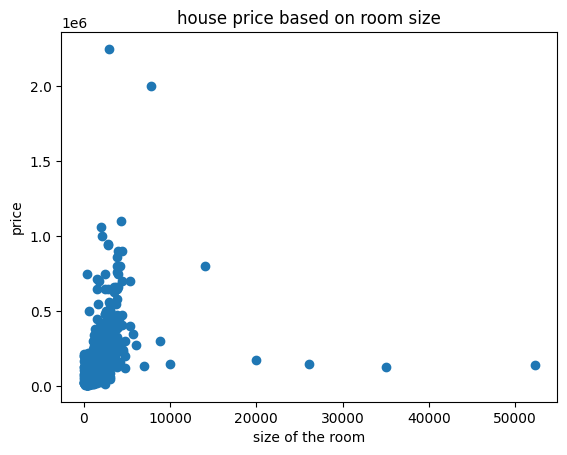

In [172]:
plt.scatter(data["size_sqft"],data["price"])
plt.xlabel("size of the room")
plt.ylabel("price")
plt.title("house price based on room size")
plt.show()

In [173]:
data.to_csv("final_dataset.csv")

In [174]:
data.shape

(10932, 6)

In [175]:
X=data.drop(columns=['price'])
Y=data['price']

In [176]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

In [70]:
# data['bath'].fillna(data['bath'].median(), inplace=True)
# data['balcony'].fillna(data['balcony'].median(), inplace=True)
# data['location'].fillna(data['location'].mode()[0], inplace=True)
# data['beds'].fillna(data['beds'].mode()[0],inplace=True)

data['bath'] = data['bath'].median()
data['balcony']=data['balcony'].median()
data['location']=data['location'].mode()[0]
data['beds']=data['beds'].mode()[0]

In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10932 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   location   10931 non-null  object 
 1   beds       10932 non-null  int64  
 2   size_sqft  10932 non-null  float64
 3   bath       10932 non-null  float64
 4   balcony    10932 non-null  float64
 5   price      10932 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 597.8+ KB


In [178]:
numerical_cols = ['bath', 'balcony', 'size_sqft']
categorical_cols = ['location', 'beds']

In [179]:
column_trans = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
              # ('scaler', StandardScaler())
        ]), numerical_cols),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_cols)
    ]
)

In [180]:
pipeline = Pipeline(steps=[
    ('preprocessor', column_trans),
    ('regressor', LinearRegression())
])

In [181]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [182]:
pipeline.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['bath', 'balcony',
                                                   'size_sqft']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['location', 'beds'])])),
                ('regressor', LinearRegression())])

In [183]:
Y_pred_linear= pipeline.predict(X_test)

In [184]:
Y_pred_linear

array([158934.5390625,  62400.9296875,  57118.6875   , ...,
       217315.2109375,  41624.09375  ,  23677.4375   ])

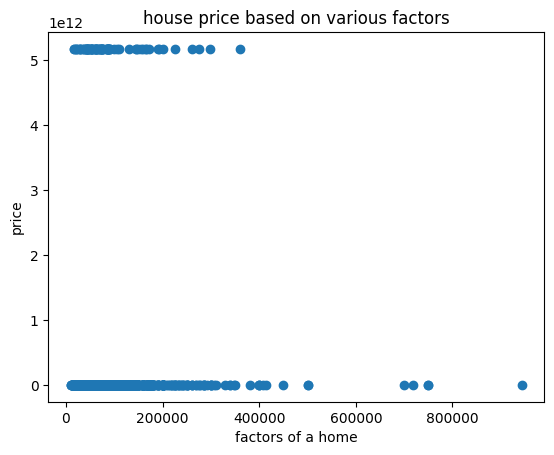

In [185]:
plt.scatter(Y_test, Y_pred_linear)
plt.xlabel("factors of a home")
plt.ylabel("price")
plt.title("house price based on various factors")
plt.show()

In [186]:
r2_lin = r2_score(Y_test, Y_pred_linear)

In [187]:
print(f'R-squared score: {r2_lin}')

R-squared score: -263664392484693.0


using lasso


In [188]:
lasso = Lasso(alpha=1.0, max_iter=10000)

In [189]:
pipeline = Pipeline(steps=[
    ('preprocessor', column_trans),
    ('regressor', lasso)
])

In [190]:
pipeline.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['bath', 'balcony',
                                                   'size_sqft']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['location', 'beds'])])),
                ('regressor', Lasso(max_iter=10000))])

In [191]:
Y_pred_lasso= pipeline.predict(X_test)

In [192]:
Y_pred_lasso

array([158675.27977258,  62181.8182415 ,  57320.92081947, ...,
       217340.95608964,  42068.15004512,  23379.77919263])

In [193]:
r2_las = r2_score(Y_test, Y_pred_lasso)

In [194]:
print(f'R-squared score: {r2_las}')

R-squared score: 0.3866620955875528


using Ridge

In [195]:
ridge = Ridge()

In [196]:
pipeline = Pipeline(steps=[
    ('preprocessor', column_trans),
    ('regressor', ridge)
])

In [197]:
pipeline.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['bath', 'balcony',
                                                   'size_sqft']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['location', 'beds'])])),
                ('regressor', Ridge())])

In [198]:
Y_pred_ridge= pipeline.predict(X_test)

In [199]:
Y_pred_ridge

array([160808.67959447,  61352.20674473,  57529.19477611, ...,
       218412.78932239,  42472.87585049,  22725.69810574])

In [200]:
r2_rid = r2_score(Y_test, Y_pred_ridge)

In [201]:
print(f'R-squared score: {r2_rid}')

R-squared score: 0.39228590700750277


In [202]:
print("linearRig",r2_lin)
#print("lasso",r2_las)
print("ridge",r2_rid)

linearRig -263664392484693.0
ridge 0.39228590700750277


In [203]:
import pickle

In [204]:
pickle.dump(pipeline, open('ridgemodel.pkl','wb'))

random forest regression

In [300]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 500, random_state = 0)

In [301]:
pipeline = Pipeline(steps=[
    ('preprocessor', column_trans),
    ('regressor', rf_model)
])

In [302]:
pipeline.fit(X_train, Y_train) 


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['bath', 'balcony',
                                                   'size_sqft']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['location', 'beds'])])),
                ('regressor',
                 RandomForestRegressor(n_estimators=500, random_state=0))])

In [303]:
Y_pred_rf= pipeline.predict(X_test)

In [304]:
X_test

,location,beds,size_sqft,bath,balcony
649,Hosakerehalli,3,2378.0,3.0,1.0
4752,Hennur Road,2,1081.0,2.0,1.0
1133,Hennur,2,1255.0,2.0,1.0
8482,Electronics City Phase 1,2,865.0,2.0,0.0
5408,Begur Road,2,1200.0,2.0,2.0
...,...,...,...,...,...
1012,5th Phase JP Nagar,2,1256.0,2.0,1.0
10660,TC Palaya,1,1350.0,1.0,0.0
4255,Malleshwaram,3,2600.0,3.0,1.0
4816,Gunjur,2,1457.0,2.0,3.0


In [305]:
Y_test

649      262000.0
4752      30270.0
1133      52320.0
8482      40000.0
5408      45000.0
           ...   
1012      62800.0
10660     55000.0
4255     237000.0
4816      60000.0
4845      36000.0
Name: price, Length: 2187, dtype: float64

In [306]:
X_train

,location,beds,size_sqft,bath,balcony
6954,JP Nagar,3,1452.0,2.0,1.0
9556,Sri Venkateshpura Layout,2,1050.0,2.0,1.0
7781,Sunder Ram Shetty Nagar,3,1480.0,3.0,2.0
11585,Govindapura,2,1500.0,2.0,2.0
7715,1st Block HRBR Layout,2,1250.0,2.0,1.0
...,...,...,...,...,...
6992,Devi Nagar,3,2000.0,3.0,2.0
6347,8th Phase JP Nagar,2,909.0,2.0,1.0
6579,Raja Rajeshwari Nagar 5th Stage,2,1095.0,2.0,1.0
1040,Panathur,3,1315.0,2.0,1.0


In [307]:
Y_train

6954      41000.0
9556      49500.0
7781      74000.0
11585     60000.0
7715      67000.0
           ...   
6992     105000.0
6347      40900.0
6579      38330.0
1040      54800.0
8862      80000.0
Name: price, Length: 8745, dtype: float64

In [308]:
Y_pred_rf

array([280634.4       ,  45722.40936508,  54807.74735426, ...,
       275498.83809524,  74009.96      ,  35026.77638095])

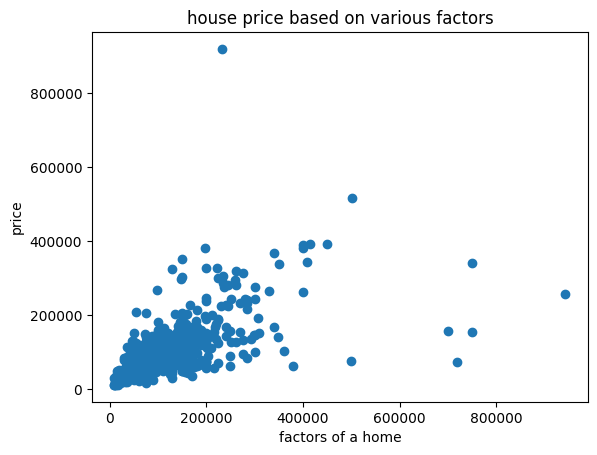

In [309]:
plt.scatter(Y_test, Y_pred_rf)
plt.xlabel("factors of a home")
plt.ylabel("price")
plt.title("house price based on various factors")
plt.show()

In [310]:
r2_rfr = r2_score(Y_test, Y_pred_rf)

In [311]:
print(f'R-squared score: {r2_rfr}')

R-squared score: 0.47596966772312777


In [312]:
pickle.dump(pipeline, open('randomForestmodel.pkl','wb'))